In [7]:
import numpy as np
import pandas as pd

In [8]:
column_names=['A','B']
df=pd.read_csv("C:\\Users\\Mehul\\Desktop\\sms+spam+collection\\SMSSpamCollection",on_bad_lines='skip',names=column_names)

In [9]:
df.head()

,A,B
0,ham\tGo until jurong point,crazy.. Available only in bugis n great world...
1,ham\tOk lar... Joking wif u oni...,NaN
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,NaN
3,ham\tU dun say so early hor... U c already the...,NaN
4,ham\tNah I don't think he goes to usf,he lives around here though


In [10]:
df=df.drop('B',axis=1)

In [11]:
df.head()

,A
0,ham\tGo until jurong point
1,ham\tOk lar... Joking wif u oni...
2,spam\tFree entry in 2 a wkly comp to win FA Cu...
3,ham\tU dun say so early hor... U c already the...
4,ham\tNah I don't think he goes to usf


DATA CLEANING

In [12]:
df[['Target','Text']]=df['A'].str.split('\t',expand=True)#how to separate a part from a string

In [13]:
df.drop('A',axis=1,inplace=True)

In [14]:
df.head()

,Target,Text
0,ham,Go until jurong point
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf


In [15]:
df.shape

(5205, 2)

Using Label Encoder to convert ham and spam into binary encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lab=LabelEncoder()

In [18]:
df['Target']=lab.fit_transform(df['Target'])

In [19]:
df.head()

,Target,Text
0,0,Go until jurong point
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,Nah I don't think he goes to usf


In [20]:
df.isnull().sum()#checking for missing values

Target    0
Text      0
dtype: int64

In [21]:
df.duplicated().sum()#count number of duplicate values

483

In [22]:
df=df.drop_duplicates(keep='first')#drop dubplicates but keep only their first copies

In [23]:
df.shape

(4722, 2)

Exploratory Data Analysis

In [24]:
grouping=df.groupby('Target')

Target
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
dtype: object

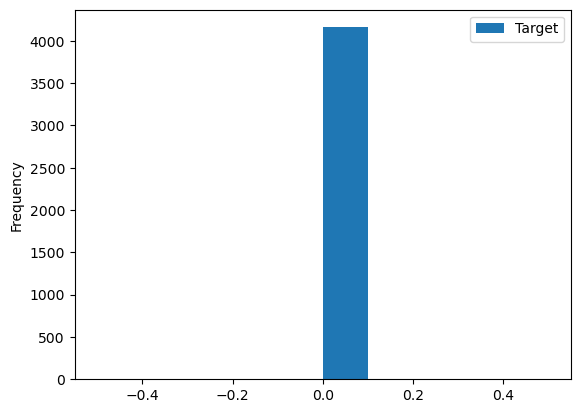

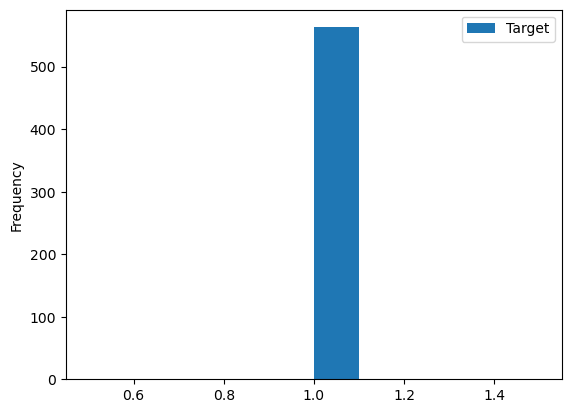

In [25]:
grouping.plot.hist()

In [35]:
df['Target'].value_counts()

0    4159
1     563
Name: Target, dtype: int64

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x206c7731050>,
 [Text(-1.023731784407087, 0.4024589837420474, 'ham'),
  Text(1.0237317844070872, -0.40245898374204714, 'spam')],
 [Text(-0.5583991551311384, 0.21952308204111676, '88.08'),
  Text(0.5583991551311385, -0.2195230820411166, '11.92')])

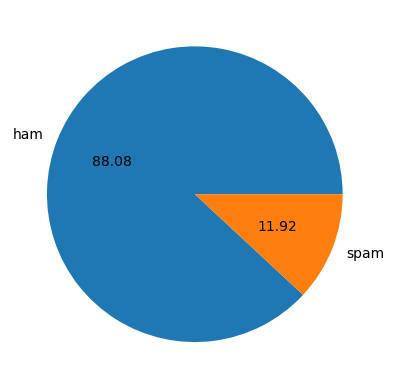

In [27]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mehul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['num_char']=df['Text'].apply(len)

In [31]:
df.head()

,Target,Text,num_char
0,0,Go until jurong point,21
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,Nah I don't think he goes to usf,32


In [32]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,Target,Text,num_char,num_words
0,0,Go until jurong point,21,4
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,Nah I don't think he goes to usf,32,9


In [34]:
df['num_sent']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,Go until jurong point,21,4,1
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,Nah I don't think he goes to usf,32,9,1


In [36]:
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,563.000000,563.000000,563.000000
mean,120.268206,23.943162,2.701599
std,42.588583,8.988544,1.432881
min,2.000000,1.000000,1.000000
25%,91.000000,18.000000,2.000000
50%,137.000000,27.000000,3.000000
75%,154.000000,31.000000,4.000000
max,183.000000,45.000000,9.000000


In [37]:
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4159.000000,4159.000000,4159.000000
mean,58.635489,14.204136,1.705458
std,46.585679,11.090989,1.240664
min,0.000000,0.000000,0.000000
25%,29.000000,7.000000,1.000000
50%,45.000000,11.000000,1.000000
75%,76.000000,18.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
import seaborn as sns

<Axes: ylabel='Count'>

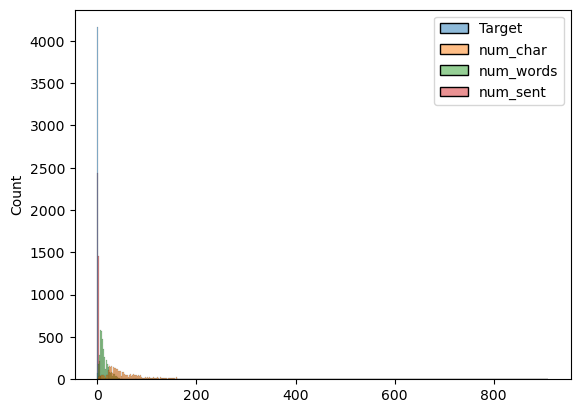

In [39]:
sns.histplot(df[df['Target']==0])

<Axes: xlabel='num_char', ylabel='Count'>

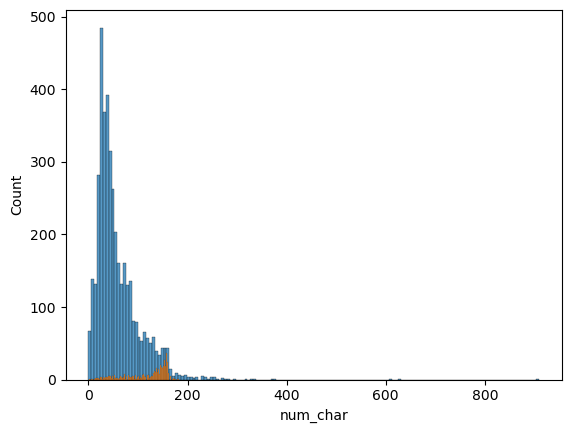

In [40]:
sns.histplot(df[df['Target']==0]['num_char'])#histogram for ham
sns.histplot(df[df['Target']==1]['num_char'],bins=100)

<Axes: xlabel='num_char', ylabel='Count'>

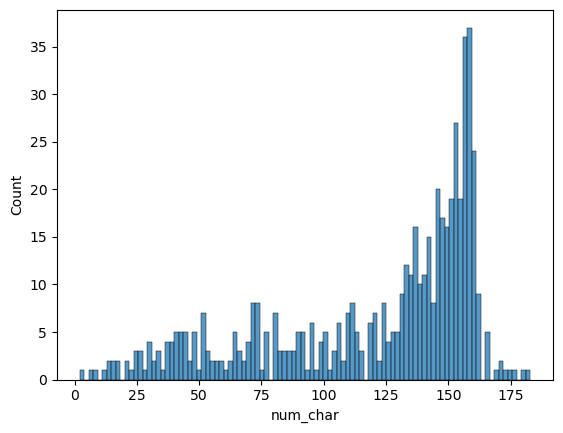

In [41]:
sns.histplot(df[df['Target']==1]['num_char'],bins=100)

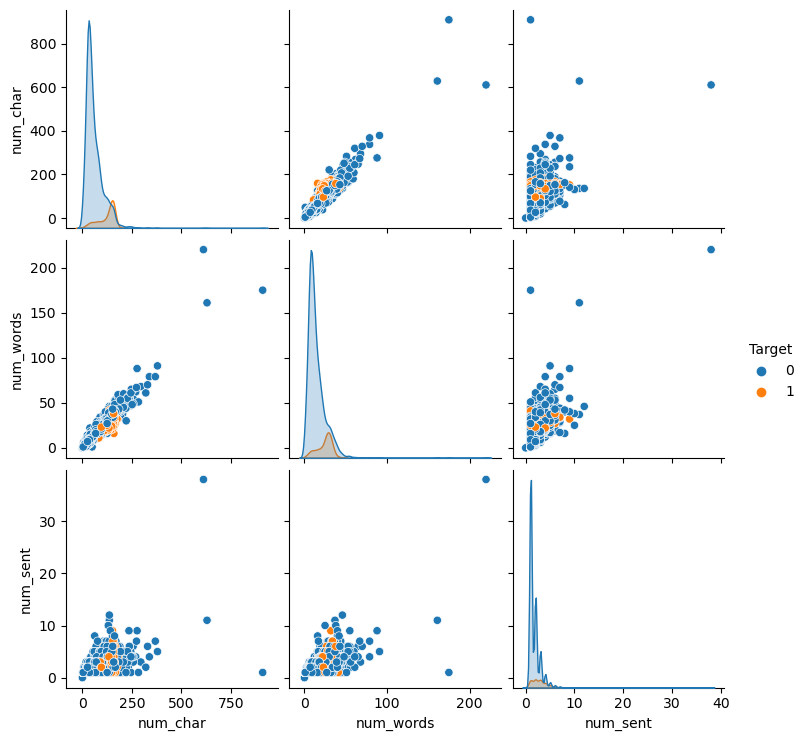

In [42]:
sns.pairplot(df,hue='Target')#checking the relation between the two.

Preprocessing stage- tokenization, removing punctuation,stemming

In [43]:
import string
punc=string.punctuation
def preprocess(text):#function to lowercase,tokenize,retain only alphanumeric values, stemming
    text=text.lower()
    text=nltk.word_tokenize(text)
    [word for word in text if word not in punc]
    arr=[]
    for i in text:
        if i.isalnum():
            arr.append(i)
    text=arr[:]
    arr.clear()                  #need to clear the arr everytime before applying another function so that the processed text doesnt get appended multiple times
    for i in text:
        arr.append(ps.stem(i))
    text=arr[:]
    arr.clear()
    for i in text:
        if i not in stopwords.words('english'):
            arr.append(i)
    return arr

In [44]:
df['Text'][8]

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [45]:
random=df['Text'][8]

In [52]:
preprocess(random)

['winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'onli']

In [51]:
from nltk.corpus import stopwords

In [97]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [135]:
""""
def remove_stopwords(text):                #function to remove stopwords.
    text=text.lower()
    text=nltk.word_tokenize(text)
    arr=[]
    for i in text:
        if i not in stopwords.words('english'):
            arr.append(i)
    return arr
"""

In [53]:
df['Text'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [49]:
ps.stem('running')

'run'

In [55]:
preprocess(df['Text'][32])

['fear', 'faint', 'housework', 'quick', 'cuppa']

In [56]:
df['preprocessed_text']=df['Text'].apply(preprocess)

In [57]:
df.head()

,Target,Text,num_char,num_words,num_sent,preprocessed_text
0,0,Go until jurong point,21,4,1,"[go, jurong, point]"
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,Nah I don't think he goes to usf,32,9,1,"[nah, think, goe, usf]"


Building a Word Cloud to show the spread of words in ham and spam categories

In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud

In [60]:
wc=WordCloud(width=500,height=500,max_font_size=100,max_words=100,background_color='white')

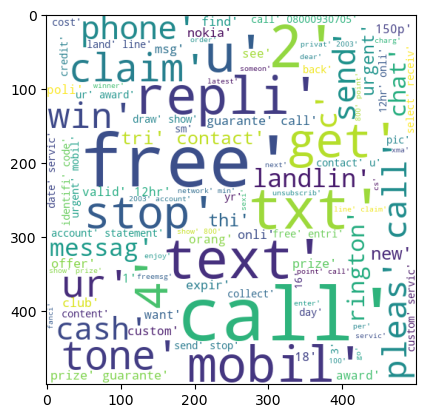

In [64]:
spamwc=wc.generate(df[df['Target']==1]['preprocessed_text'].str.cat(sep=" "))
plt.imshow(spamwc)#shows frequenly occuring words in spam messages.

In [62]:
print(df['preprocessed_text'].apply(type))
"""
it was giving error that word cloud generate cant be applied on mixed type of text, so we first apply 'type' function on the pre
processed text column to check the type, then use the 'astype' to convert all data into same data type
"""

0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
5200    <class 'list'>
5201    <class 'list'>
5202    <class 'list'>
5203    <class 'list'>
5204    <class 'list'>
Name: preprocessed_text, Length: 4722, dtype: object


"\nit was giving error that word cloud generate cant be applied on mixed type of text, so we first apply 'type' function on the pre\nprocessed text column to check the type, then use the 'astype' to convert all data into same data type\n"

In [63]:
df['preprocessed_text']=df['preprocessed_text'].astype(str)

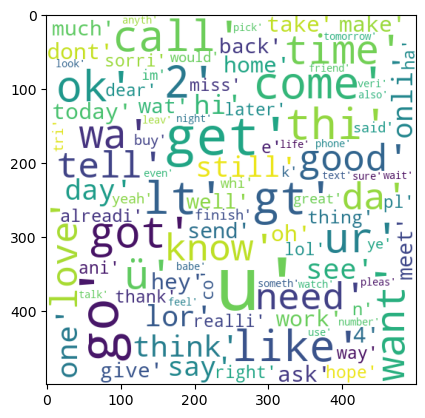

In [65]:
hamwc=wc.generate(df[df['Target']==0]['preprocessed_text'].str.cat(sep=" "))
plt.imshow(hamwc)#for ham

To get a better idea of top frequent words in ham and spam messages, we check their frequencies

In [66]:
df[df['Target']==1]['preprocessed_text'].tolist()

["['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']",
 "['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send']",
 "['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'onli']",
 "['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']",
 "['urgent', '1', 'week', 'free', 'membership']",
 "['xxxmobilemovieclub', 'use', 'credit']",
 "['england', 'v', 'macedonia', 'dont', 'miss', 'news', 'txt', 'ur', 'nation', 'team', '87077', 'eg', 'england', '87077', 'tri', 'wale']",
 "['thank', 'subscript', 'rington', 'uk', 'mobil', 'charg', 'pleas', 'confirm', 'repli', 'ye', 'repli', 'charg']",
 "[

In [67]:
sp=[]
for msg in df[df['Target']==1]['preprocessed_text'].tolist():
    for word in msg.split():
        sp.append(word)

In [68]:
len(sp)

7718

In [69]:
from collections import Counter
Counter(sp).most_common(25)#top 25 words in the spam messages.

[("'call',", 225),
 ("'free',", 127),
 ("'2',", 119),
 ("'txt',", 101),
 ("'ur',", 84),
 ("'mobil',", 81),
 ("'repli',", 81),
 ("'u',", 80),
 ("'text',", 78),
 ("'4',", 74),
 ("'claim',", 71),
 ("'stop',", 68),
 ("'get',", 56),
 ("'new',", 52),
 ("'prize',", 51),
 ("'thi',", 51),
 ("'servic',", 47),
 ("'contact',", 47),
 ("'award',", 45),
 ("'send',", 45),
 ("'phone',", 42),
 ("['urgent',", 41),
 ("'nokia',", 40),
 ("'tone',", 38),
 ("'messag',", 37)]

In [70]:
pd.DataFrame(Counter(sp).most_common(25))

,0,1
0,"'call',",225
1,"'free',",127
2,"'2',",119
3,"'txt',",101
4,"'ur',",84
5,"'mobil',",81
6,"'repli',",81
7,"'u',",80
8,"'text',",78
9,"'4',",74


In [71]:
sns.barplot(pd.DataFrame(Counter(sp).most_common(25)[0]),pd.DataFrame(Counter(sp).most_common(25)[1]))

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [72]:
top_item=[item for item,count in Counter(sp).most_common(25)]
count_item=[count for item,count in Counter(sp).most_common(25)]# due to above error we do like this

<Figure size 1500x800 with 0 Axes>

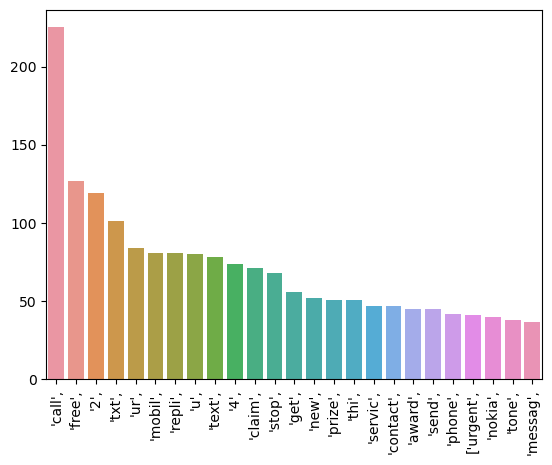

<Figure size 1500x800 with 0 Axes>

In [73]:
sns.barplot(x=top_item,y=count_item)
plt.xticks(rotation='vertical')
plt.figure(figsize=(15,8))

MODEL BUILDING

In [74]:
from sklearn.feature_extraction.text import CountVectorizer#using bag of words

In [75]:
cv=CountVectorizer()

In [76]:
x=cv.fit_transform(df['preprocessed_text']).toarray()#toarray used to convert sparse array to dense array

In [78]:
y=df['Target'].values

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [82]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
print(accuracy_score(y_test,y_pred1))

0.8405081157374735


In [91]:
print(precision_score(y_test,y_pred1))#very loew precision score

0.4230769230769231


In [92]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

In [93]:
print(accuracy_score(y_test,y_pred2))

0.9703599153140438


In [94]:
print(precision_score(y_test,y_pred2))

0.8636363636363636


In [95]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)

In [96]:
print(accuracy_score(y_test,y_pred3))

0.958362738179252


In [97]:
print(precision_score(y_test,y_pred3))#good precision---check with tfidf if more precision can be achieved

0.9663865546218487


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tfidf=TfidfVectorizer()

In [103]:
x=tfidf.fit_transform(df['preprocessed_text']).toarray()

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [105]:
gnb.fit(x_train,y_train)
y_pred01=gnb.predict(x_test)

In [106]:
print(accuracy_score(y_test,y_pred01))

0.8383909668313339


In [107]:
print(precision_score(y_test,y_pred1))

0.4230769230769231


In [108]:
mnb.fit(x_train,y_train)
y_pred02=mnb.predict(x_test)

In [109]:
print(accuracy_score(y_test,y_pred02))

0.9442484121383204


In [110]:
print(precision_score(y_test,y_pred02))#improved precision with tfidf

1.0


In [112]:
bnb.fit(x_train,y_train)
y_pred03=bnb.predict(x_test)

In [113]:
print(accuracy_score(y_test,y_pred03))

0.958362738179252


In [114]:
print(precision_score(y_test,y_pred03))

0.9663865546218487


In [122]:
"""
now we can choose either bernoulli naive bayes with bag of words or multinomial naive bayes with tfidf
"""


'\nnow we can choose either bernoulli naive bayes with bag of words or multinomial naive bayes with tfidf\n'

TESTING DIFFERENT MODELS ON THE DATA

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB#comparing multinomial nb with other classifiers

In [123]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
bc=BaggingClassifier(n_estimators=60,random_state=2)
et=ExtraTreesClassifier(n_estimators=60,random_state=2)
adc=AdaBoostClassifier(n_estimators=60,random_state=2)
gdc=GradientBoostingClassifier(n_estimators=60,random_state=2)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=60,random_state=2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': adc, 
    'BgC': bc, 
    'ETC': et,
    'GBDT':gdc,
}##preparing a dictionary of all the objects so that we can iterate over it using a function and apply all classifiers one by one

In [127]:
def fit_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [133]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = fit_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9682427664079041
Precision -  0.9629629629629629
For  KN
Accuracy -  0.9004940014114327
Precision -  1.0
For  NB
Accuracy -  0.9442484121383204
Precision -  1.0
For  DT
Accuracy -  0.9329569513055752
Precision -  0.8504672897196262
For  LR
Accuracy -  0.9470712773465068
Precision -  0.9130434782608695
For  RF
Accuracy -  0.9661256175017643
Precision -  0.9765625
For  AdaBoost
Accuracy -  0.9562455892731122
Precision -  0.921875
For  BgC
Accuracy -  0.958362738179252
Precision -  0.8827586206896552
For  ETC
Accuracy -  0.9682427664079041
Precision -  0.9629629629629629
For  GBDT
Accuracy -  0.9505998588567396
Precision -  0.9716981132075472
